In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#because of our business aim we decided to treat prediabetes and diabetes as one category - illness
df.loc[df['Diabetes_012']==2, 'Diabetes_012']=1

# Train Validation Test split

In [3]:
from sklearn.model_selection import train_test_split

y = np.array(df['Diabetes_012'])
X = df.drop(['Diabetes_012'], axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, stratify=Y_val, test_size=0.3, random_state=42)

#for validation group
test_df = X_test.copy()
test_df['Diabetes_012']=Y_test.copy()

#for us to see the results
val_df = X_val.copy()
val_df['Diabetes_012']= Y_val.copy()

#for us to train
train_df = X_train.copy()
train_df['Diabetes_012']=Y_train.copy()

# **EDA**

# Data understanding and basic overview

**Main info**

Data frame from:  [Data frames with columns explanations](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv)


**Where is the data from?**

Data frame includes data collected in 2015 from The Behavioral Risk Factor Surveillance System (BRFSS) which is a health-related telephone survey that is collected annually by the CDC.


**Main goal : predict the risk of diabetes**


Data frame Kaggle desc:
 **diabetes _ 012 _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.

 **Business aim:**

 Create an app to help medical stuff predict the risk of diabetes for their patients in order to start early treatment or monitor patients health more closely

**columns desc**

* Diabetes_012 : 0-no diabetes, 1- prediabetes, 2-diabates

* HighBP : 1-high blood pressure, 0- no

* HighChol: 1-high cholesterol, 0- no

* CholCheck : 1- cholesterol check in 5 years, 0- no

* BMI : Body Mass index

* Smoker : 1-have you smoked at leat 100 cigarettes in your life, 0-no

* Stroke : 1-has a stroke, 0-no

* HeartDisease : 1- coronary heart disease or myocardical infection, 0-no

* PhysActivity: 1- physical activity in past 30 days, 0-no

* Fruits : 1- consume fruits 1 or more times a day, 0-no

* Veggies: 1-consume vegetables 1 or more times a day, 0-no

* HvyAlcoholConsumption: 1- Adult woman having more than 7 drinks a week, men 14 drinks per week, 0-no

* AnyHealthcare : 1- any kind of healthcare inculding isurance etc, 0-no

* NoDocbcCost : 1- was there a time in the past year when you needed to see a doctor but could aford it, 0-no

* GenHealth: What do you sey your general health is on a scale 1-5, 1=excellent and 5=poor

* MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
scale 1-30 days ---> Scale 1-30

* PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
scale 1-30 days ---> Scale 1-30

* DiffWalk : 1-you have serious difficulty walking or climbing stairs, 0-no

* Sex : 0-female, 1-male

* Age: 13-level category (_AGEG5YR) 1=18-24, 13 = 80 and older

* Education: education level 1-6 where 1=never attened school, 2=grades 1-8 ...

* Income: income scale 1-8, where 1<10,000$, 8>75,000$

In [4]:
train_df.head(10)

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
52059      0.0       0.0        0.0  32.0     1.0     0.0   
68134      0.0       0.0        1.0  24.0     1.0     0.0   
95597      1.0       0.0        1.0  27.0     0.0     0.0   
186284     0.0       0.0        1.0  27.0     0.0     0.0   
110275     1.0       0.0        1.0  32.0     1.0     0.0   
233171     0.0       0.0        1.0  22.0     0.0     0.0   
252939     1.0       1.0        1.0  23.0     0.0     0.0   
191834     1.0       0.0        1.0  27.0     0.0     0.0   
215079     0.0       1.0        1.0  21.0     0.0     0.0   
141676     0.0       0.0        1.0  33.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
52059                    0.0           1.0     0.0      1.0  ...          1.0   
68134                    0.0           1.0     0.0      1.0  ...          0.0   
95597                    0.0           1.0     1.0      1.0  ...          0.0   
186284                   0.0           0.0     1.0      1.0  ...          1.0   
110275                   0.0           1.0     1.0      1.0  ...          0.0   
233171                   0.0           0.0     1.0      1.0  ...          0.0   
252939                   1.0           1.0     1.0      1.0  ...          1.0   
191834                   0.0           1.0     1.0      1.0  ...          0.0   
215079                   0.0           1.0     0.0      1.0  ...          0.0   
141676                   0.0           0.0     1.0      1.0  ...          0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
52059       2.0       0.0       0.0       1.0  1.0  11.0        6.0     3.0   
68134       2.0       0.0       0.0       0.0  1.0   6.0        5.0     8.0   
95597       2.0       0.0       0.0       0.0  1.0  10.0        6.0     7.0   
186284      2.0       0.0       2.0       0.0  0.0   5.0        6.0     8.0   
110275      1.0       0.0       0.0       0.0  1.0  11.0        6.0     8.0   
233171      1.0       0.0       0.0       0.0  1.0   6.0        6.0     8.0   
252939      3.0       3.0       3.0       0.0  0.0   7.0        4.0     1.0   
191834      2.0      14.0       0.0       0.0  0.0   7.0        5.0     8.0   
215079      2.0       0.0       1.0       0.0  1.0   4.0        6.0     8.0   
141676      2.0       0.0       0.0       0.0  0.0  13.0        5.0     6.0   

        Diabetes_012  
52059            0.0  
68134            0.0  
95597            0.0  
186284           0.0  
110275           0.0  
233171           0.0  
252939           1.0  
191834           0.0  
215079           1.0  
141676           0.0  

[10 rows x 22 columns]

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177576 entries, 52059 to 163618
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                177576 non-null  float64
 1   HighChol              177576 non-null  float64
 2   CholCheck             177576 non-null  float64
 3   BMI                   177576 non-null  float64
 4   Smoker                177576 non-null  float64
 5   Stroke                177576 non-null  float64
 6   HeartDiseaseorAttack  177576 non-null  float64
 7   PhysActivity          177576 non-null  float64
 8   Fruits                177576 non-null  float64
 9   Veggies               177576 non-null  float64
 10  HvyAlcoholConsump     177576 non-null  float64
 11  AnyHealthcare         177576 non-null  float64
 12  NoDocbcCost           177576 non-null  float64
 13  GenHlth               177576 non-null  float64
 14  MentHlth              177576 non-null  float64
 15  P

* We have 20 features to use in predictions
* All features are numeric type
* There are no missing values

In [6]:
train_df.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     83
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_012             2
dtype: int64

* Features are categorical or already binned

# Feature correlation

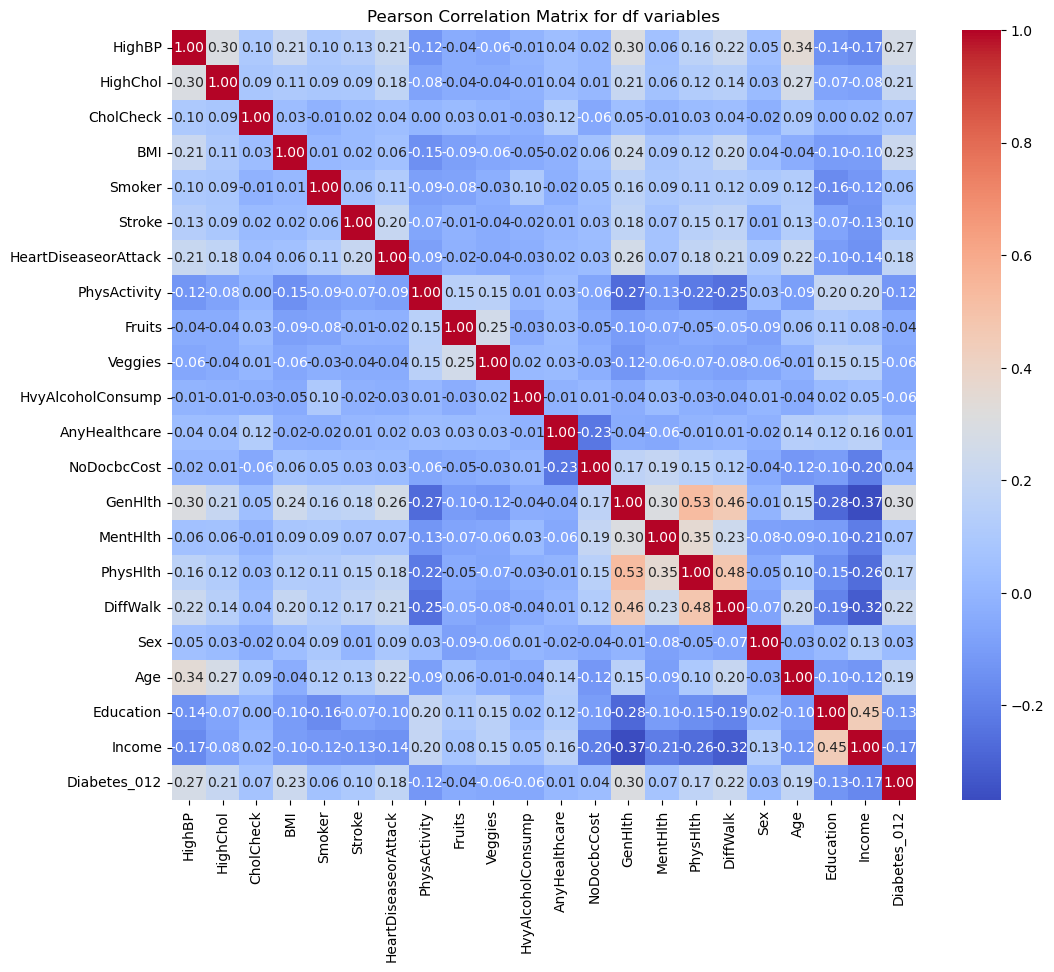

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for df variables")
plt.show()

* columns most correlated with diabetes: HighBP, HighChol, BMI, HeartDisease, PhysActivity, GenHlth, Income, Education, PhysHlth
* columns the least correlated: CholCheck, Smoker, Fruits, Veggies, Alcohol, Sex, NoDocbcCost

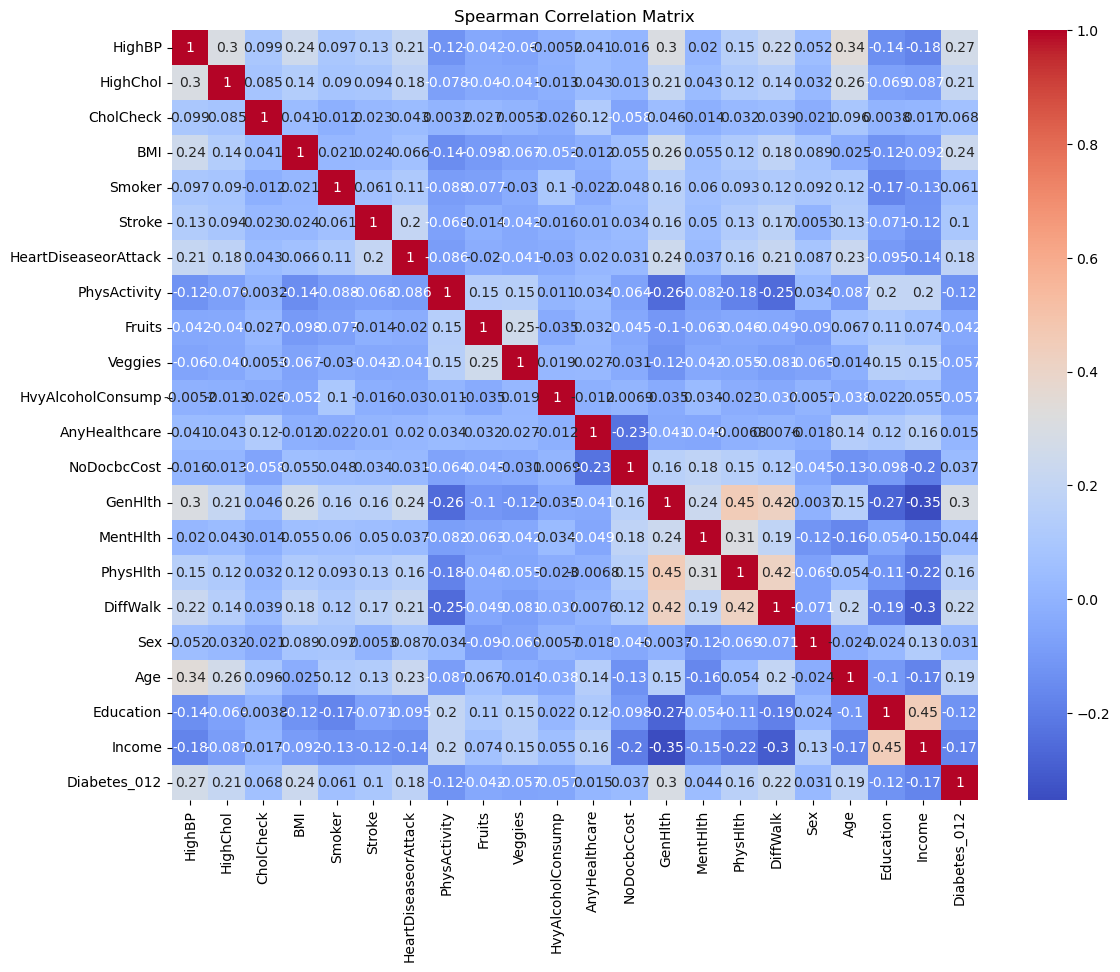

In [8]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

* Similar observations as from Pearson

# Diabetes (target) characteristics

<Axes: xlabel='Diabetes_012', ylabel='Count'>

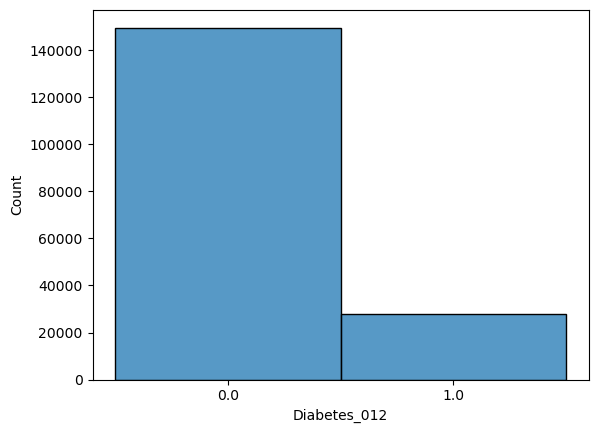

In [9]:
sns.histplot(train_df['Diabetes_012'].astype(str))

* We have class imbalance - that doesn't surprise us because thats the reflection of reality

In [10]:
x=train_df.shape[0]
print("Percent of people without diabetes:" ,(train_df["Diabetes_012"]==0).sum()/x)
print("Percent of people with prediabetes/diabetes:" ,(df["Diabetes_012"]==1).sum()/x)

Percent of people without diabetes: 0.8424111366400865
Percent of people with prediabetes/diabetes: 0.2251261431725008


# Diabetes vs health related features

In [11]:
fig = px.histogram(train_df,
                   x='BMI',
                   marginal='box',
                   nbins=47,
                   color='Diabetes_012',
                   color_discrete_sequence=['green',"yellow",'orange'],
                   title="BMI distribution"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("BMI vs diabetes corr: " , train_df.Diabetes_012.corr(train_df.BMI))

BMI vs diabetes corr:  0.22511289296105752


* the median of BMI for people without diabetes is lower than for people with diabetes
* There are more outliers with very high BMI than with low 
* Distribution of BMI similar to normal 

Text(0.5, 1.0, 'Smoking vs Diabetes')

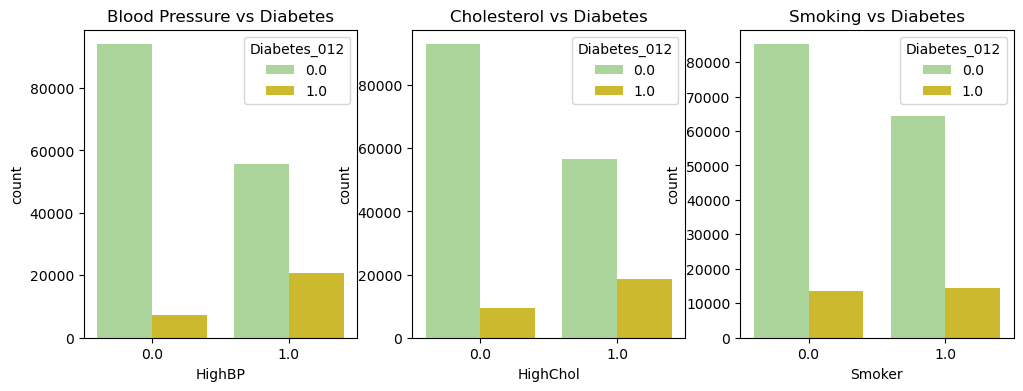

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.countplot(data=train_df, x='HighBP', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0])
axs[0].set_title('Blood Pressure vs Diabetes')

sns.countplot(data=train_df, x='HighChol', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1])
axs[1].set_title('Cholesterol vs Diabetes')

sns.countplot(data=train_df, x='Smoker', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[2])
axs[2].set_title('Smoking vs Diabetes')

* the relationship looks very similar for every feature
* there are more people who have diabetes among people with HighChol and HighBP

In [13]:
pd.crosstab(train_df['HighBP'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
HighBP                            
0.0           92.763106   7.236894
1.0           72.916011  27.083989

In [14]:
pd.crosstab(train_df['HighChol'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
HighChol                          
0.0           90.764437   9.235563
1.0           75.360372  24.639628

In [15]:
pd.crosstab(train_df['Smoker'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Smoker                            
0.0           86.227642  13.772358
1.0           81.753380  18.246620

* We can deffinitely see the relationship between diabetes and highBP, highChol
* for smoker the difference is not big, as we observed from correlation matrix

Text(0.5, 1.0, 'Stroke vs Diabetes')

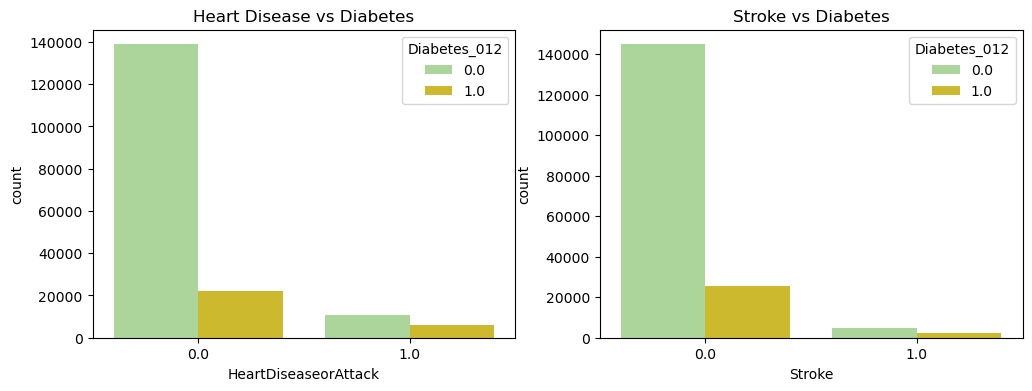

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(data=train_df, x='HeartDiseaseorAttack', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0])
axs[0].set_title('Heart Disease vs Diabetes')

sns.countplot(data=train_df, x='Stroke', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1])
axs[1].set_title('Stroke vs Diabetes')

In [17]:
pd.crosstab(train_df['Stroke'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Stroke                            
0.0           84.997183  15.002817
1.0           66.266741  33.733259

In [18]:
pd.crosstab(train_df['HeartDiseaseorAttack'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012                0.0        1.0
HeartDiseaseorAttack                      
0.0                   86.325716  13.674284
1.0                   64.175443  35.824557

* for both of these heart conditions we can also see a relationship between diabetes

Text(0.5, 1.0, 'Alcoholism vs Diabetes')

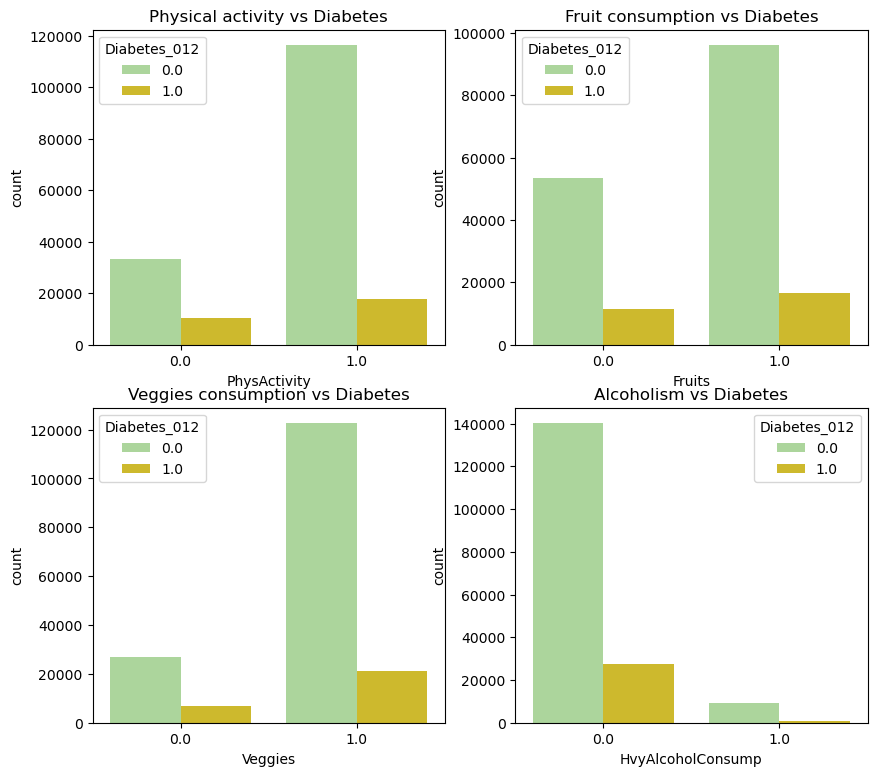

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
sns.countplot(data=train_df, x='PhysActivity', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0,0])
axs[0,0].set_title('Physical activity vs Diabetes')

sns.countplot(data=train_df, x='Fruits', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0,1])
axs[0,1].set_title('Fruit consumption vs Diabetes')

sns.countplot(data=train_df, x='Veggies', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1,0])
axs[1,0].set_title('Veggies consumption vs Diabetes')

sns.countplot(data=train_df, x='HvyAlcoholConsump', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1,1])
axs[1,1].set_title('Alcoholism vs Diabetes')

We can't say much from the plots because again the data is imbalanced

In [20]:
pd.crosstab(train_df['PhysActivity'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
PhysActivity                      
0.0           76.491762  23.508238
1.0           86.742949  13.257051

In [21]:
pd.crosstab(train_df['Fruits'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Fruits                            
0.0           82.207446  17.792554
1.0           85.414502  14.585498

In [22]:
pd.crosstab(train_df['Veggies'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Veggies                           
0.0           79.919427  20.080573
1.0           85.246345  14.753655

In [23]:
pd.crosstab(train_df['HvyAlcoholConsump'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012             0.0        1.0
HvyAlcoholConsump                      
0.0                83.736841  16.263159
1.0                92.762826   7.237174

* We don't observe big differences between lifestyle features and diabetes
* It corresponds to the correlation matrix : correlations were low

<Axes: xlabel='GenHlth', ylabel='count'>

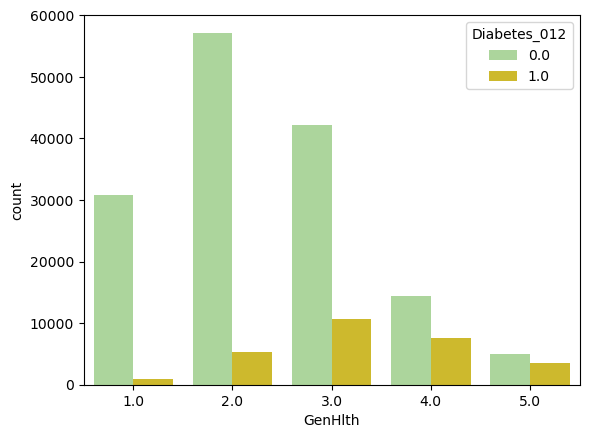

In [24]:
sns.countplot(data=train_df, x='GenHlth', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

*Reminder: 1-excellent, 5-poor*
* We can see a growing number of people with diabetes from GenHlth 1-3 and then again a slight drop, it can be related to the fact that there is less observations for those groups

Text(0.5, 1.0, 'Mental health vs Diabetes')

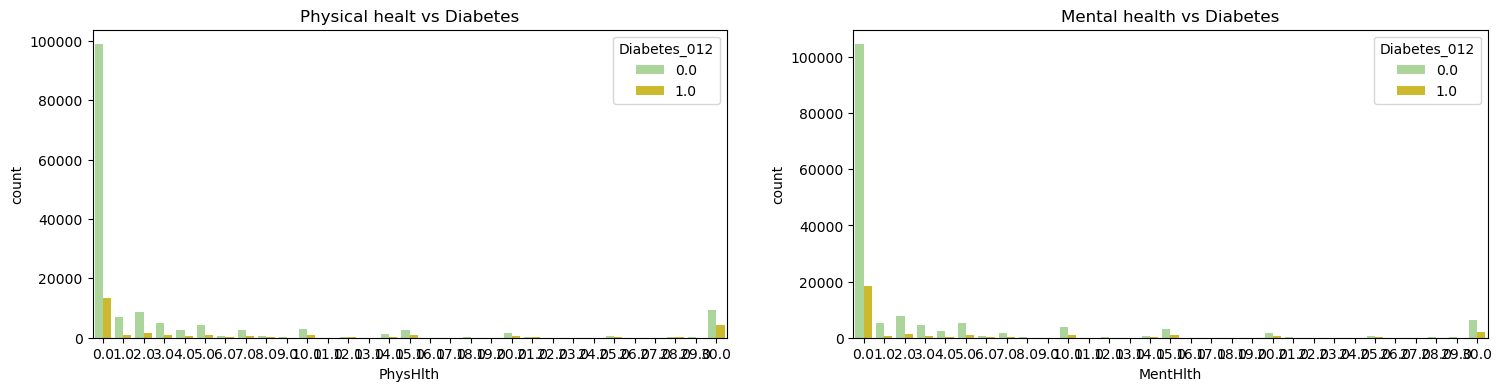

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))
sns.countplot(data=train_df, x='PhysHlth', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0])
axs[0].set_title('Physical healt vs Diabetes')

sns.countplot(data=train_df, x='MentHlth', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1])
axs[1].set_title('Mental health vs Diabetes')

* Although those features have 30 categories the most observations are for 0.0 so it's hard to make observations
* The correlation for PhysHlth was high, for MentHlth low - maybe join those features later

# Diabetes vs non medical features

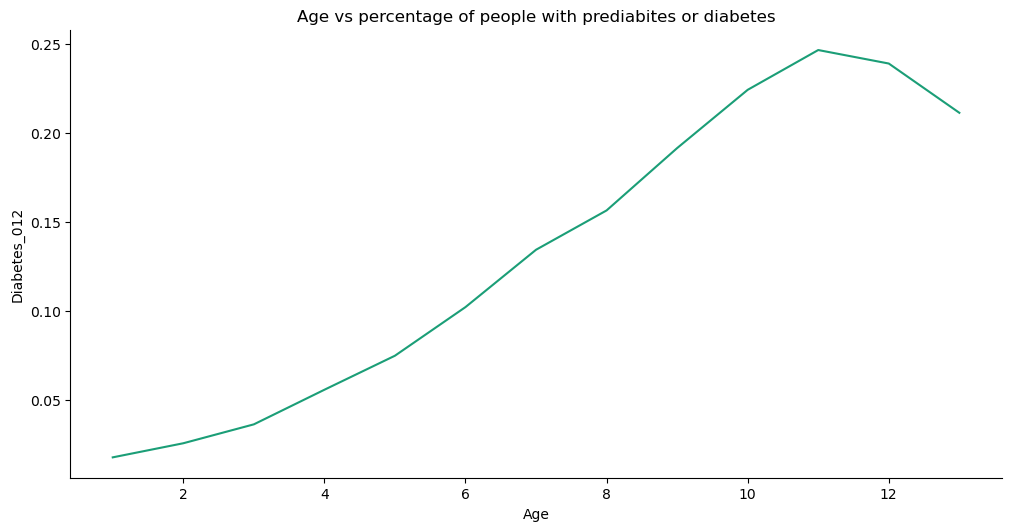

In [26]:
train_df_01 = train_df.copy()
train_df_01[train_df_01['Diabetes_012']==2] = 1

age_diabetes_percentage = train_df.groupby('Age')['Diabetes_012'].mean().reset_index()
age_diabetes_percentage

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Age']
  ys = series['Diabetes_012']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = age_diabetes_percentage.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Age vs percentage of people with prediabites or diabetes')
plt.xlabel('Age')
_ = plt.ylabel('Diabetes_012')

* We can see a trend - the older someone is the more percent of this age group has diabetes
* There is a slight decrease for very old people

<Axes: xlabel='Age', ylabel='count'>

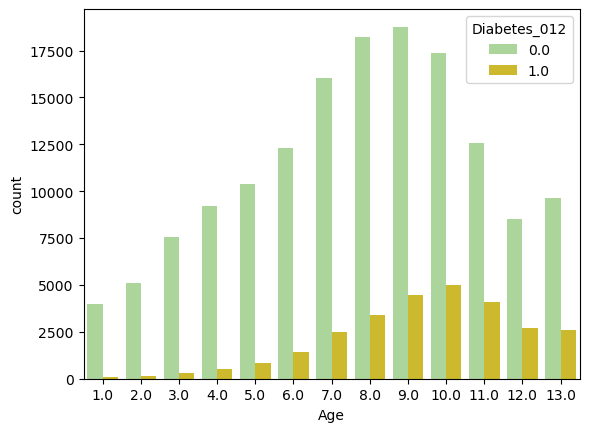

In [27]:
sns.countplot(train_df, x='Age',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

<Axes: xlabel='Education', ylabel='count'>

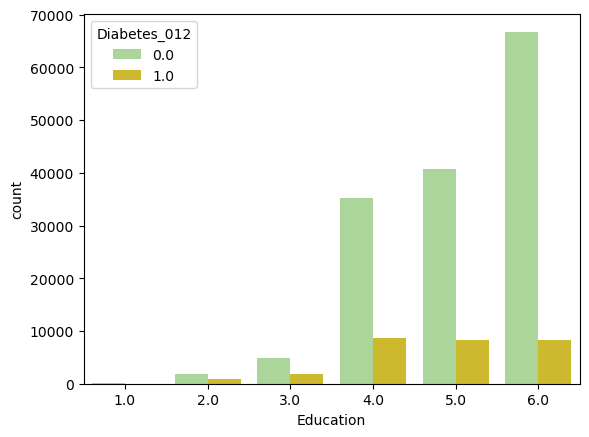

In [28]:
sns.countplot(train_df, x='Education',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

* The majority of respondents were well educated
* The level of people with diabetes is similar for groups 4,5,6 and lower for 1,2,3 - it can be because of class imbalance

In [29]:
pd.crosstab(train_df['Education'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Education                         
1.0           70.491803  29.508197
2.0           67.065447  32.934553
3.0           72.446520  27.553480
4.0           80.401231  19.598769
5.0           83.229230  16.770770
6.0           88.857679  11.142321

* When we look at percentage we can see a decreasing trend: the percentage of ill people decreases with increasing education

<Axes: xlabel='Sex', ylabel='count'>

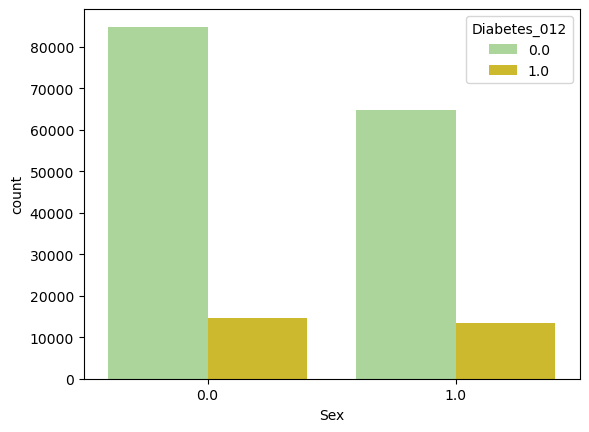

In [30]:
sns.countplot(train_df, x='Sex',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

In [31]:
pd.crosstab(train_df['Sex'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0        1.0
Sex                               
0.0           85.243413  14.756587
1.0           82.964338  17.035662

* The results for both genders are similar, it corresponds to the correlation matrix - sex had a low corr

In [32]:
pd.crosstab(train_df["AnyHealthcare"],train_df["Diabetes_012"], normalize='index')*100

Diabetes_012         0.0        1.0
AnyHealthcare                      
0.0            86.647532  13.352468
1.0            84.116992  15.883008

* Same observations as above

<Axes: xlabel='Income', ylabel='count'>

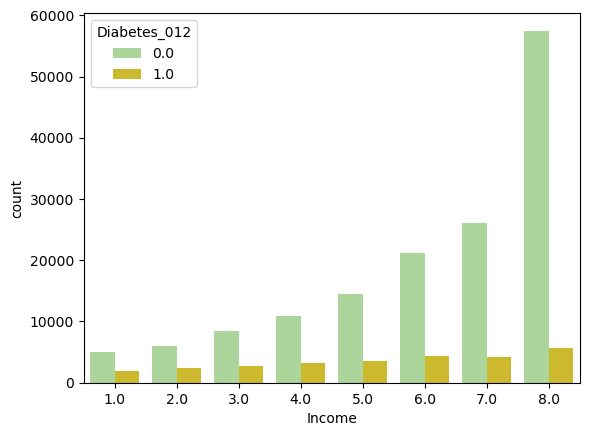

In [33]:
sns.countplot(train_df, x='Income',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

In [34]:
pd.crosstab(train_df["Income"],train_df["Diabetes_012"], normalize='index')*100

Diabetes_012        0.0        1.0
Income                            
1.0           72.823374  27.176626
2.0           71.063370  28.936630
3.0           75.250447  24.749553
4.0           77.506199  22.493801
5.0           80.252800  19.747200
6.0           83.224367  16.775633
7.0           86.164496  13.835504
8.0           90.927209   9.072791

* The majority of respondents are wealthy
* We can also see a trend from a table: For richer people the percentage of diabetes decreases

# **Feature Engineering**

# Feature importance original df

**Feature importance methods**

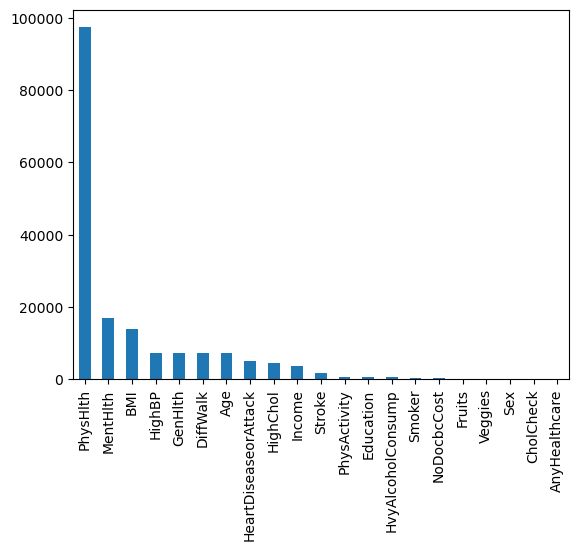

In [35]:
# chi score 
from sklearn.feature_selection import chi2

X= X_train
y=Y_train

chi_scores = chi2(X,y)
chi_values = pd.Series(chi_scores[0], X.columns) # the higher the score, higher the importance
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

chi_originaldf = chi_values

* The least important features: AnyHealthcare, Cholcheck, sex, veggies, fruits, nodocbCost, Smoker, Alcohol (also from correlation)
* The most important features: PhysHlth, MentHlth, BMI, HighBP, GenHlth, DiffWalk,Age

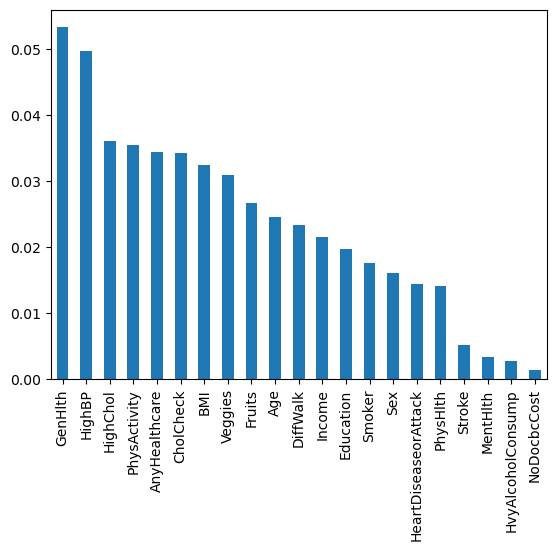

In [36]:
# mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False).plot.bar()

MI_originaldf = mutual_info

* Observations slightly different from chi2
* The least important features from both methods: NoDocbcCost, Alcohol
* The most important features from both methods: GenHlth, HighBP, BMI, Age, DiffWalk

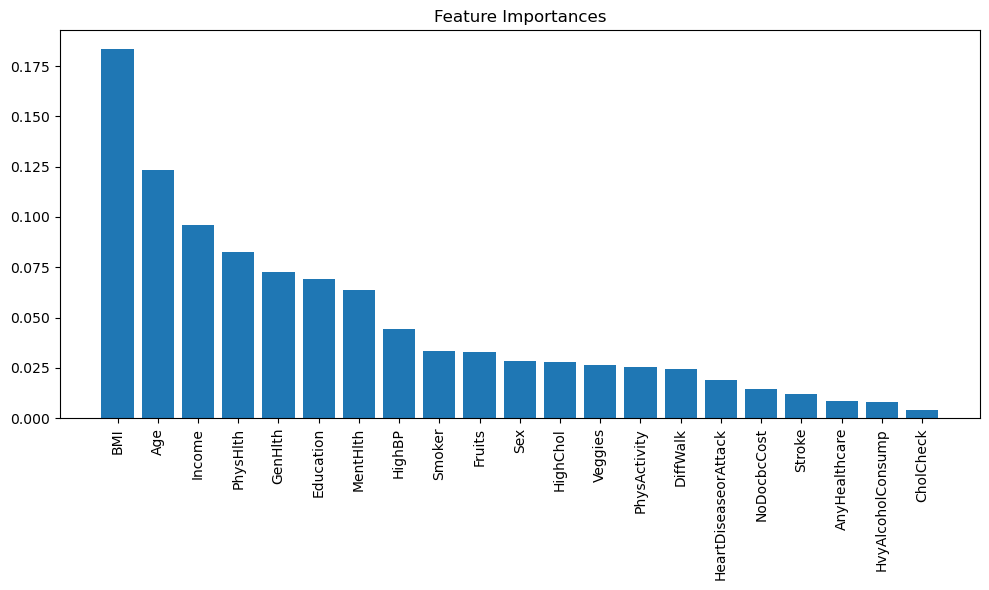

In [37]:
# random forest 
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=300, random_state=1)
forest.fit(X,y)
importances = forest.feature_importances_

feature_names = X.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

**the least important features from all of the methods:**

CholCheck, NoDobcbCost, Alcohol

**The most important features from all methods:**

BMI, GenHlth, Age, HighBP


# Transforming data

In [38]:
def change_education_to_name(Education):
    if Education in [1,2]:
        return 'PrimaryEducation'
    elif Education in [3,4]:
        return 'HighSchoolEducation'
    else:
        return 'CollageEducation' #collage not finished and bachelors degrees

In [39]:
def feature_binning(X):
    A= X.copy()
    A['BMI'] = pd.qcut(A['BMI'], q=10, labels=False)
    A['Age'] = pd.qcut(A['Age'], q=7 ,labels=[0,1,2,3,4,5,6])
    A['Education'] =  A['Education'].apply(change_education_to_name)
    return A

In [40]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(X):
    A=X.copy()
    label_encoder = LabelEncoder()
    #A['BMI'] = label_encoder.fit_transform(A['BMI'])
    A['Age'] = label_encoder.fit_transform(A['Age'])
    A['Income'] = label_encoder.fit_transform(A['Income'])
    A['Education'] = label_encoder.fit_transform(A['Education'])
    return A

**Checking if feature importances increased of not**

In [41]:
# chi2 without binning, only labeling

X_train_labeled = label_encoding(X_train)
chi_scores = chi2(X_train_labeled,Y_train)
chi_values = pd.Series(chi_scores[0], X_train_labeled.columns) # the higher the score,the  higher the importance
chi_values.sort_values(ascending=False, inplace=True)

print("Chi scores before binning vs after binning:")
print("BMI:", chi_originaldf['BMI'] ,"VS" ,chi_values["BMI"])
print("Age:", chi_originaldf['Age'], "VS", chi_values["Age"])
print("Education:", chi_originaldf['Education'], "VS", chi_values['Education'])
print("Income:", chi_originaldf['Income']," Vs ", chi_values["Income"])


Chi scores before binning vs after binning:
BMI: 13850.521156937884 VS 13850.521156937884
Age: 7144.00817105856 VS 8159.3473712787345
Education: 571.6129386598384 VS 712.7352174147105
Income: 3691.8109633144613  Vs  4422.284945252011


In [42]:
# chi2 after binning with labeling
X_train_binned1 = label_encoding(feature_binning(X_train))

chi_scores = chi2(X_train_binned1,Y_train)
chi_values = pd.Series(chi_scores[0], X_train_binned1.columns) # the higher the score,the  higher the importance
chi_values.sort_values(ascending=False, inplace=True)

print("Chi scores before binning vs after binning:")
print("BMI:", chi_originaldf['BMI'] ,"VS" ,chi_values["BMI"])
print("Age:", chi_originaldf['Age'], "VS", chi_values["Age"])
print("Education:", chi_originaldf['Education'], "VS", chi_values['Education'])
print("Income:", chi_originaldf['Income']," Vs ", chi_values["Income"])

Chi scores before binning vs after binning:
BMI: 13850.521156937884 VS 20188.003054202567
Age: 7144.00817105856 VS 7905.429405552325
Education: 571.6129386598384 VS 1613.8668662449202
Income: 3691.8109633144613  Vs  4422.284945252011


* All feature importances increased for chi2 test
* We reduced the number of categories to help with generalization

In [43]:
def add_new_features(X):
  A=X.copy()
  A['BloodHealth']= A['HighBP'] + A['HighChol'] # interpr: 0-good blood health, 1- (this or that) medium, 2- both high BP and chol =bad
  A['HeartHealth'] = A['Stroke'] + A['HeartDiseaseorAttack'] # interpretation as above
     # thos features have the same scale and meaning so their sum also
  #A['BMI_GenHlth'] = A['BMI']* A['GenHlth']
  #A['Ment_Phys_Hlth'] = A['MentHlth'] + A['PhysHlth']
  return A

<Axes: >

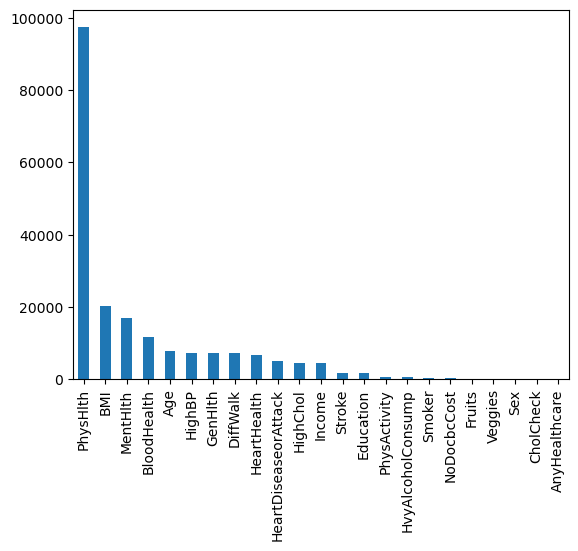

In [44]:
# chi2 importances after adding new features to binned data

X_new= label_encoding(add_new_features(X_train_binned1))
chi_scores = chi2(X_new,Y_train)
chi_values = pd.Series(chi_scores[0], X_new.columns) # the higher the score,the  higher the importance
chi_values.sort_values(ascending=False, inplace=True)

chi_values.plot.bar()

* The importance of 2 new features is drastically higher than others
* Diat is more important than fruits and veggies but also not very relevant

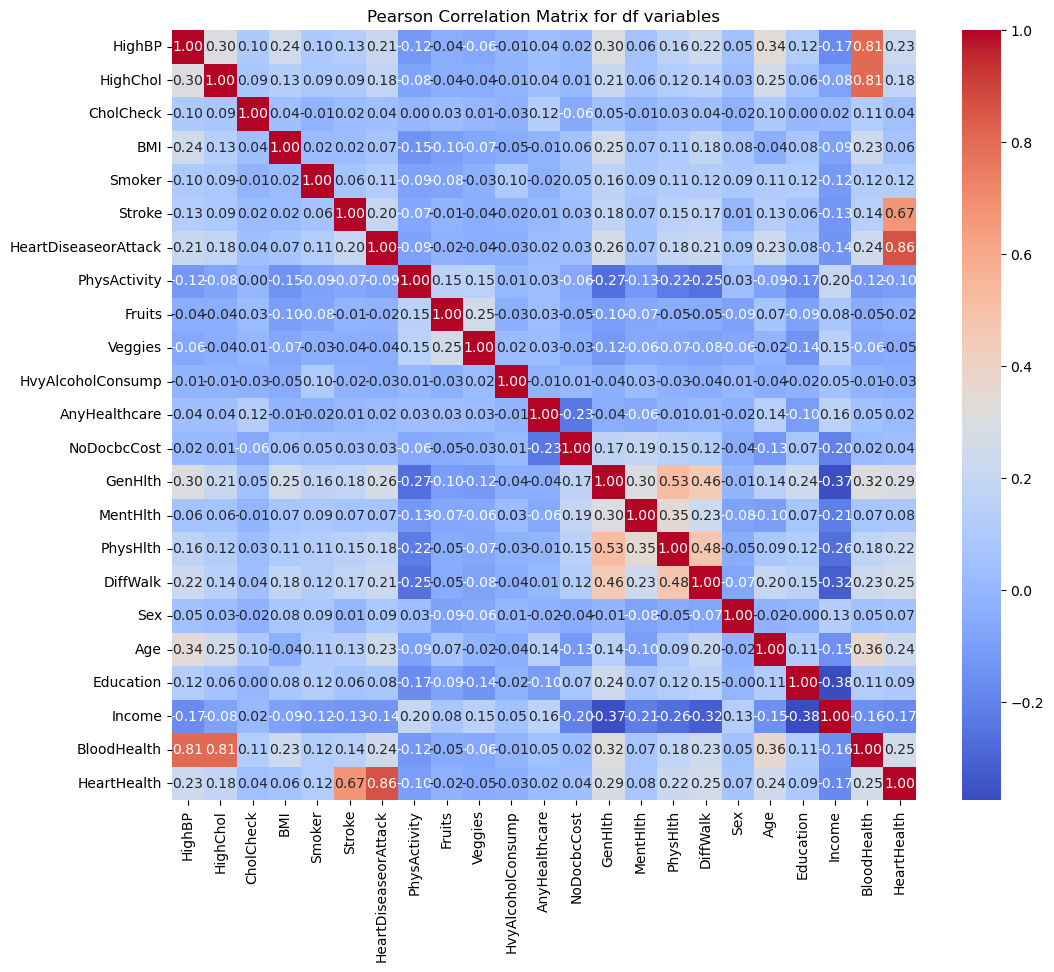

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_new.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for df variables")
plt.show()

We need to drop previous columns when we create new ones based on them because we will have redundancy

In [46]:
def drop_features(X):
    A = X.copy()
    A = A.drop(columns=['HighBP','HighChol','CholCheck','HeartDiseaseorAttack','Stroke','Fruits','Veggies','HvyAlcoholConsump','NoDocbcCost'])
    return A

In [47]:
# random forest feature importance after dropping
rf = RandomForestClassifier(random_state=1)
X=(drop_features(X_new))
rf.fit(X, Y_train)
importances = rf.feature_importances_
top_indices = importances.argsort()[-15:][::-1]  
top_features = X.columns[top_indices] 

In [48]:
top_features

Index(['BMI', 'Income', 'Age', 'PhysHlth', 'MentHlth', 'GenHlth',
       'BloodHealth', 'Education', 'Smoker', 'Sex', 'HeartHealth',
       'PhysActivity', 'DiffWalk', 'AnyHealthcare'],
      dtype='object')

In random forest also the new features are the most important

# Model selection

*We have a few functions to work on choosing the best dataframe for models*

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

**Random Forest**

In [50]:
# for original data 
X = X_train
Y=Y_train
Xv = X_val

randomF = RandomForestClassifier()
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.9993736398299735
AUC for validation set: 0.791253129807537


The model is overfitted

In [51]:
# Random forest for data frame with new and dropped columns
X = label_encoding(drop_features(add_new_features(X_train)))
Y=Y_train
Xv = label_encoding(drop_features(add_new_features(X_val)))

randomF = RandomForestClassifier()
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.9974554766953537
AUC for validation set: 0.7807455911222527


In [52]:
# Random forest for binned dataframe
X = label_encoding(feature_binning(X_train))
Y=Y_train
Xv = label_encoding(feature_binning(X_val))

randomF = RandomForestClassifier()
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)


AUC for training set: 0.9967392082383656
AUC for validation set: 0.7825706842697815


In [53]:
# Let't try Random forest only on top features from feature importance
X = X_new[top_features]
Y = Y_train
Xv = label_encoding(add_new_features(feature_binning(X_val)))[top_features]

randomF = RandomForestClassifier()
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.9896441235636441
AUC for validation set: 0.7734175378155921


**Let's now focus on the X data frame which is X_train with added new features and selected 15 most important**

In [54]:
X.head()

BMI  Income  Age  PhysHlth  MentHlth  GenHlth  BloodHealth  Education  \
52059     7       2    5       0.0       0.0      2.0          0.0          0   
68134     2       7    1       0.0       0.0      2.0          0.0          0   
95597     4       6    4       0.0       0.0      2.0          1.0          0   
186284    4       7    1       2.0       0.0      2.0          0.0          0   
110275    7       7    5       0.0       0.0      1.0          1.0          0   

        Smoker  Sex  HeartHealth  PhysActivity  DiffWalk  AnyHealthcare  
52059      1.0  1.0          0.0           1.0       1.0            1.0  
68134      1.0  1.0          0.0           1.0       0.0            1.0  
95597      0.0  1.0          0.0           1.0       0.0            1.0  
186284     0.0  0.0          0.0           0.0       0.0            1.0  
110275     1.0  1.0          0.0           1.0       0.0            1.0

Let's see if we can achieve a better score with hyperparametr

In [55]:
X = X_new[top_features]
Y = Y_train
Xv = label_encoding(add_new_features(feature_binning(X_val)))[top_features]

randomF = RandomForestClassifier(n_estimators=600, max_depth=5)
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)



AUC for training set: 0.8112581328656293
AUC for validation set: 0.8112605996327756


We prevented overfitting, but let's try some RandomSearch parameters to see if we can get a better score

In [56]:
n_estimators = [300,350,400,450,500]
max_depth = [3,4,5,6]
bootstrap =[True, False]

param_grid= {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "bootstrap": bootstrap
}

randomF = RandomForestClassifier()

X_for_randomsearch = label_encoding(add_new_features(feature_binning(X_val)))[top_features]
Y_for_randomsearch = Y_val
from sklearn.model_selection import RandomizedSearchCV
search_rf = RandomizedSearchCV(estimator= randomF, param_distributions=param_grid,cv=8, scoring="roc_auc")
search_rf.fit(X_for_randomsearch,Y_for_randomsearch)
search_rf.best_params_

{'n_estimators': 450, 'max_depth': 6, 'bootstrap': True}

Let's check if the score will be better

In [57]:
randomF = RandomForestClassifier(n_estimators=450, max_depth=6, bootstrap=True)
randomF.fit(X,Y)
train_predictions = randomF.predict_proba(X)
Val_predictions = randomF.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.8148130508369462
AUC for validation set: 0.8138317011637779


The results are slightly better than previous and we don't have overfitting

Let's check variables interpretation with Shap

In [91]:
import shap


In [97]:
model = randomF
X_sample = X.sample(n=200)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample) 

#dalej nie działa trzeba poprawić
#shap.summary_plot(shap_values,X_sample)

**Gradient Boosting**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
boost_clf = GradientBoostingClassifier()
boost_clf.fit(X,Y)
train_predictions = boost_clf.predict_proba(X)
Val_predictions = boost_clf.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)


AUC for training set: 0.8233129053612064
AUC for validation set: 0.8207920430196319


We don't have overfitting, quite a good score

Let's try parameters

In [63]:
n_estimators = [350,400,450,500]
learning_rate = [0.1,0.2,0.3]
max_depth=[1,2,3,4,5,6]

param_grid= {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate
}

gboost = GradientBoostingClassifier()

X_for_randomsearch = label_encoding(add_new_features(feature_binning(X_val)))[top_features]
Y_for_randomsearch = Y_val
from sklearn.model_selection import RandomizedSearchCV
search_rf = RandomizedSearchCV(estimator= gboost, param_distributions=param_grid,cv=5, scoring="roc_auc")
search_rf.fit(X_for_randomsearch,Y_for_randomsearch)
search_rf.best_params_

{'n_estimators': 350, 'max_depth': 2, 'learning_rate': 0.1}

In [64]:
boost_clf = GradientBoostingClassifier(n_estimators=400, max_depth=2, learning_rate=0.1)
boost_clf.fit(X,Y)
train_predictions = boost_clf.predict_proba(X)
Val_predictions = boost_clf.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)


AUC for training set: 0.823085401067347
AUC for validation set: 0.8205810606697947


The predictions here are only better for training data, for validation the score inst better

**XGBoost**

In [98]:
import xgboost as xgb
from xgboost import XGBClassifier

In [109]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
xgb_clf = XGBClassifier(max_depth=3, subsample=1)
xgb_clf.fit(X,Y)

train_predictions = xgb_clf.predict_proba(X)
Val_predictions = xgb_clf.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.8253393712267675
AUC for validation set: 0.8207818702866254


After trying some parameters, it's the best result so far

**Logistic Regression**

In [124]:
from sklearn.linear_model import LogisticRegression

In [131]:
lr = LogisticRegression()
lr.fit(X,Y)

train_predictions = lr.predict_proba(X)
Val_predictions = lr.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

AUC for training set: 0.8160634977453138
AUC for validation set: 0.8150379099204957


c:\Users\rogal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [132]:
param_grid={
    'penalty': ["l1", "l2", "elasticnet", "None"],
    'C' : np.logspace(-5,5,10),
    'solver' : ["lbfgs", "newton-cg", "liblinear"],
    'max_iter': [100,500,1000]
}

X_for_search = label_encoding(add_new_features(feature_binning(X_val)))[top_features]
Y_for_search = Y_val

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lr, param_grid=param_grid,cv=3)
best_model = grid_search.fit(X_for_search, Y_for_search)

c:\Users\rogal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\rogal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\rogal\anaconda3\Lib\site-packages

In [134]:
best_model.fit(X,Y)
train_predictions = best_model.predict_proba(X)
Val_predictions = best_model.predict_proba(Xv)
auc = roc_auc_score(Y_train, train_predictions[:, 1])
print("AUC for training set:", auc)

auc = roc_auc_score(Y_val, Val_predictions[:, 1])
print("AUC for validation set:", auc)

c:\Users\rogal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\rogal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\rogal\anaconda3\Lib\site-packages

AUC for training set: 0.81608859387987
AUC for validation set: 0.8150523972725502


The score very similar to LogisticRegression without parameters

**So far models best scores summary (for df with new features)**

* Random Forest:

    *for training set: 0.8148*

    *for validation set: 0.8138*


* Gradient Boosting:

    *for training set: 0.8233*

    *for validation set: 0.8208*


* **XGBoost** (the best so far) :

    *for training set: 0.8253*

    *for validation set: 0.8208*


* Logistic Regression:

    *for training set: 0.8161*

    *for validation set: 0.8150*